In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import os

In [2]:
%run livecricket_functions.py

In [3]:
#single processed file
processed_file = pd.read_csv('myfile.csv')
#processed_file = pd.read_excel('/home/arnab/Code/live_cricket_analysis/Suquoia_analysis/Control(CV)/D5-A_1_F-1DeepCut_resnet50_CVvsGFprojectJul16shuffle1_1030000-processed.xlsx')
#processed_file = pd.read_excel('/home/arnab/Code/live_cricket_analysis/Suquoia_analysis/Germ-free(GF)/D5-C_1_F-1DeepCut_resnet50_CVvsGFprojectJul16shuffle1_1030000-processed.xlsx')

In [4]:
processed_file

,Second,Frame,nosex,nosey,noselikelihood,noseFreeze,leftearx,lefteary,leftearlikelihood,leftearFreeze,...,rightearFreeze,tailbasex,tailbasey,tailbaselikelihood,tailbaseFreeze,stimx,stimy,stimlikelihood,stimFreeze,FullBodyFreeze
0,0.000000,0,27.497619,8.847001,1.0,0,27.405908,6.823524,1.0,0,...,0,24.493115,4.333865,0.999994,0,NaN,NaN,0.004451,0,0
1,0.033333,1,27.493756,8.846306,1.0,0,27.399385,6.825284,1.0,0,...,0,24.491511,4.337793,0.999994,0,NaN,NaN,0.004008,0,0
2,0.066667,2,27.523068,8.780606,1.0,1,27.373224,6.822655,1.0,1,...,1,24.494341,4.343025,0.999994,1,NaN,NaN,0.003759,0,1
3,0.100000,3,27.518792,8.771852,1.0,1,27.370281,6.829991,1.0,1,...,1,24.442062,4.325502,0.999995,1,NaN,NaN,0.003620,0,1
4,0.133333,4,27.502271,8.788379,1.0,1,27.384532,6.846642,1.0,1,...,1,24.434391,4.325764,0.999994,1,NaN,NaN,0.003243,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18065,602.166667,18065,80.272858,13.118503,1.0,0,79.774215,14.566622,1.0,0,...,0,81.215672,19.374677,1.000000,0,26.237368,63.771036,1.000000,1,0
18066,602.200000,18066,80.330879,12.852330,1.0,0,79.771394,14.358839,1.0,0,...,0,81.240980,19.205584,1.000000,0,26.239684,63.771187,1.000000,1,0
18067,602.233333,18067,80.393277,12.396724,1.0,0,79.870203,14.139786,1.0,0,...,0,81.237252,18.945174,1.000000,0,26.239780,63.770548,1.000000,1,0
18068,602.266667,18068,80.398429,11.777240,1.0,0,80.058140,13.814704,1.0,0,...,0,81.396092,18.678790,1.000000,0,26.238238,63.771666,1.000000,0,0


In [5]:
fps = 30
mouse_x, mouse_y = get_mouse_centroid(processed_file)
mouse_speed = get_mouse_speed(processed_file)
cricket_speed = get_cricket_speed(processed_file)
heading_cricket_mouse = get_mouse_heading_to_cricket(processed_file)
mouse_displacement = get_distance_travelled(processed_file)
distance_to_cricket = get_distance_to_cricket(processed_file)
print(f"mouse displacement: {mouse_displacement:.2f} cm in {len(processed_file)/fps:.2f} seconds")

# For each of the functions below you can pass a start and end frame to get the data for a specific part of the video
first_10seconds_start = 0
first_10seconds_end = 10*fps
mouse_displacement_10seconds = get_distance_travelled(processed_file,
                                                    first_10seconds_start,
                                                    first_10seconds_end)

print(f"mouse displacement in first 10 seconds: {mouse_displacement_10seconds:.2f} cm")

mouse displacement: 4184.71 cm in 602.33 seconds
mouse displacement in first 10 seconds: 12.51 cm


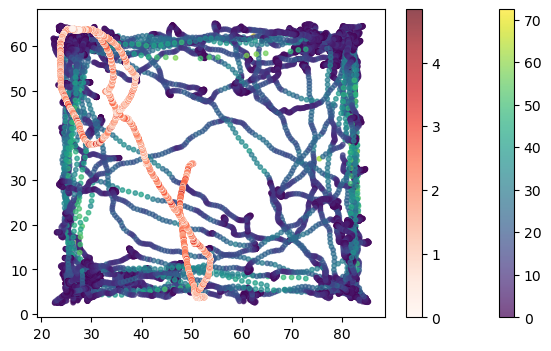

In [6]:
plt.figure(figsize = (7,4), dpi = 100)
plt.scatter(mouse_x,mouse_y, c = mouse_speed, alpha = 0.7, s = 10)
_= plt.colorbar()
plt.scatter(processed_file.stimx,processed_file.stimy, c = cricket_speed, alpha = 0.7, s = 10, cmap = 'Reds')
_ = plt.colorbar()

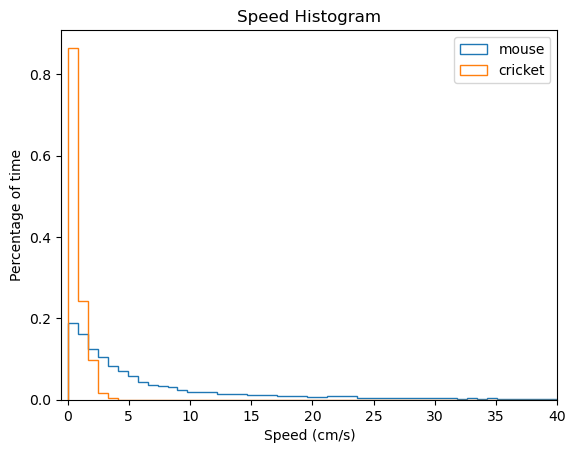

In [7]:
_ = plt.hist(mouse_speed, bins = np.linspace(0, 40, 50), histtype = 'step', label = 'mouse', density = True)
_ = plt.hist(cricket_speed, bins = np.linspace(0, 40, 50), histtype = 'step', label = 'cricket', density = True)
plt.xlim(-0.5, 40)
plt.legend()
plt.xlabel('Speed (cm/s)')
plt.ylabel('Percentage of time')
plt.title('Speed Histogram')
plt.show()

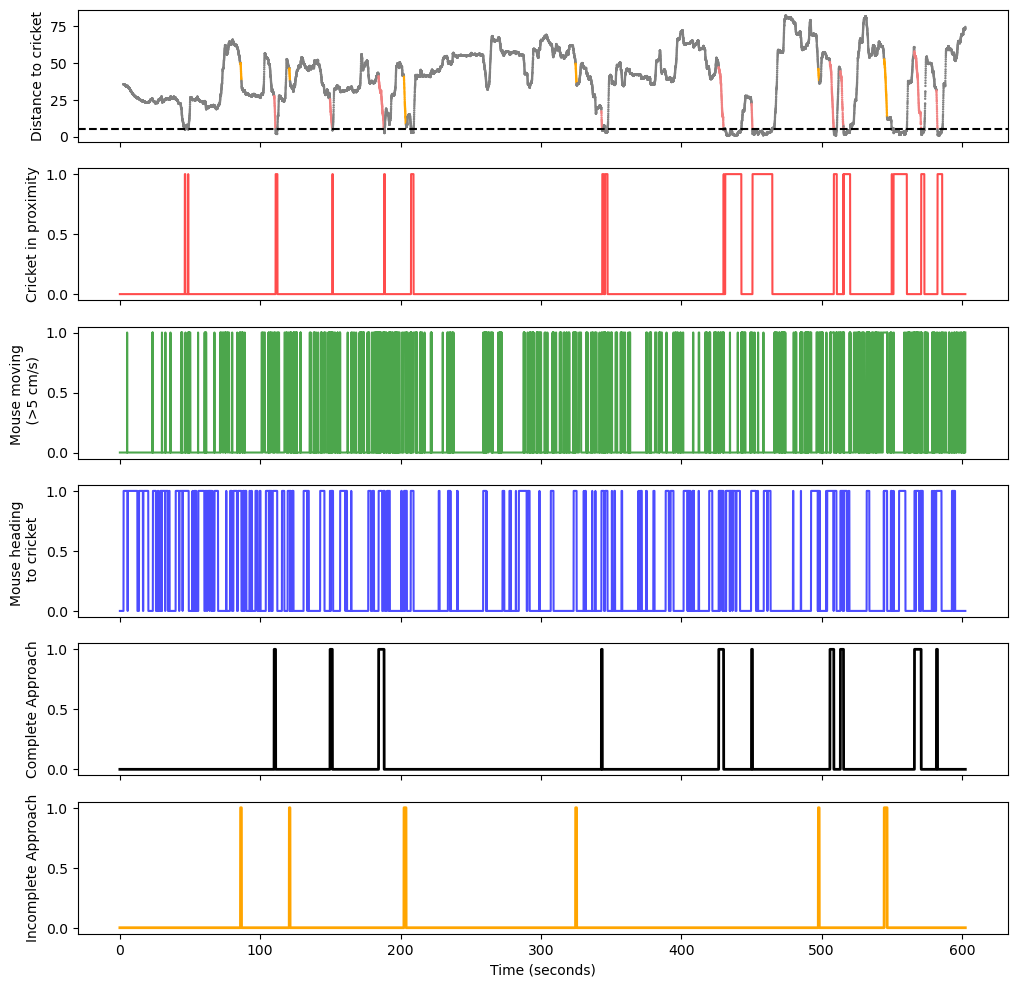

In [8]:
# Get approach events
approach_events, incomplete_approach_events = get_approach_events(distance_to_cricket,
                                                                mouse_speed,
                                                                heading_cricket_mouse,
                                                                processed_file, plot=True)

In [9]:
len(approach_events), len(incomplete_approach_events)

(10, 6)

In [10]:
print(approach_events)
# print(incomplete_approach_events)

[(3296, 3327), (4491, 4540), (5529, 5646), (10291, 10308), (12798, 12902), (13499, 13519), (15175, 15257), (15398, 15465), (16981, 17124), (17451, 17473)]


In [11]:
approach_heading = []
for start, end in approach_events:
    heading_cricket_mouse_approach = get_mouse_heading_to_cricket(processed_file, start, end)
    approach_heading.append(heading_cricket_mouse_approach)

incomplete_approach_heading = []
for start, end in incomplete_approach_events:
    heading_cricket_mouse_approach = get_mouse_heading_to_cricket(processed_file, start, end)
    incomplete_approach_heading.append(heading_cricket_mouse_approach)

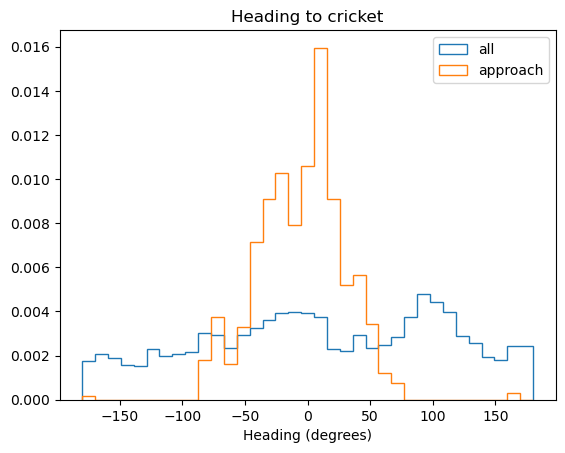

In [12]:
_= plt.hist(heading_cricket_mouse,
            bins = np.linspace(-180, 180, 36),
            histtype = 'step',density = True, label = 'all')
_ = plt.hist(np.concatenate(approach_heading),
            bins = np.linspace(-180, 180, 36),
            histtype = 'step',density = True, label = 'approach')
plt.xlabel('Heading (degrees)')
plt.title('Heading to cricket')
plt.legend()

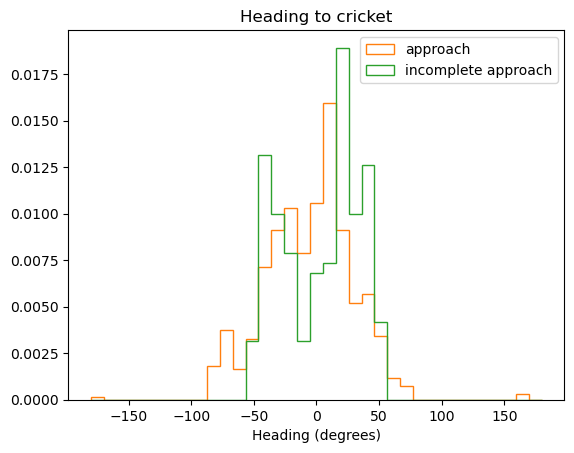

In [13]:
_ = plt.hist([])
_ = plt.hist(np.concatenate(approach_heading),
            bins = np.linspace(-180, 180, 36),
            histtype = 'step',density = True, label = 'approach')
_ = plt.hist(np.concatenate(incomplete_approach_heading),
            bins = np.linspace(-180, 180, 36),
            histtype = 'step',density = True, label = 'incomplete approach')
plt.legend()
plt.xlabel('Heading (degrees)')
plt.title('Heading to cricket')
plt.legend()

In [14]:
def pad_sequences(sequences, filter_size=3):
    from scipy.ndimage import median_filter
    from scipy.interpolate import interp1d
    
    # First interpolate NaNs and apply median filter to each sequence
    processed_sequences = []
    for seq in sequences:
        seq = np.array(seq)
        if len(seq) == 0:
            processed_sequences.append(seq)
            continue
            
        # Interpolate intermediate NaNs
        if np.any(np.isnan(seq)):
            valid_mask = ~np.isnan(seq)
            if np.sum(valid_mask) > 1:  # Need at least 2 points to interpolate
                valid_indices = np.where(valid_mask)[0]
                valid_values = seq[valid_mask]
                interp_func = interp1d(valid_indices, valid_values, 
                                     kind='linear', bounds_error=False, 
                                     fill_value='extrapolate')
                seq = interp_func(np.arange(len(seq)))
        
        # Apply median filter for smoothing
        if len(seq) >= filter_size:
            seq = median_filter(seq, size=filter_size)
        
        processed_sequences.append(seq)
    
    # Then pad sequences with NaNs
    max_len = max(len(seq) for seq in processed_sequences)
    padded_sequences = np.array([np.pad(seq, (max_len - len(seq), 0),
                                    constant_values=np.nan)

                                for seq in processed_sequences])
    return padded_sequences

In [15]:
speed_trial = []
cricket_azimuth = []

for start, end in approach_events:
    speed_trial.append(mouse_speed[start:end])
    cricket_azimuth.append(heading_cricket_mouse[start:end])

padded_speed_trial = pad_sequences(speed_trial)
padded_cricket_azimuth = pad_sequences(cricket_azimuth)

In [16]:
len(padded_cricket_azimuth)

10

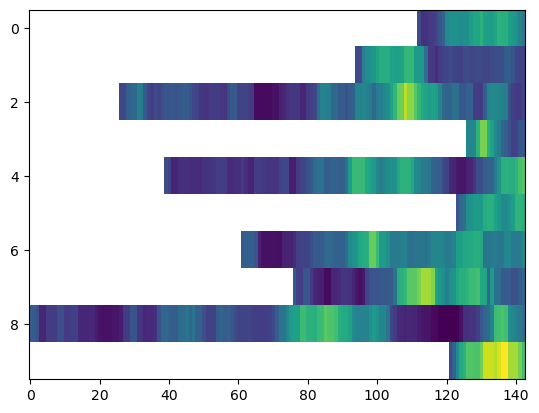

In [17]:
plt.imshow(padded_speed_trial, aspect = 'auto', interpolation = 'none')

/tmp/ipykernel_5550/764007153.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ = plt.gca().set_xticklabels([f'{tick:.1f}' for tick in np.flip(current_ticks)])


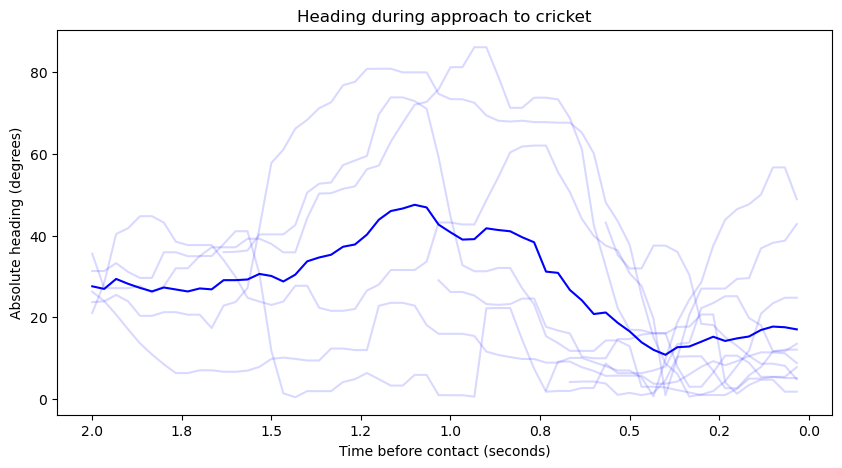

In [19]:
#plot the speed and azimuth
plt.figure(figsize=(10, 5))
# plt.plot(padded_speed_trial.T)
plt.plot(np.arange(len(padded_cricket_azimuth[0][-60:]))/30, np.abs(padded_cricket_azimuth[:,-60:]).T, color='blue', alpha=0.15)
plt.plot(np.arange(len(padded_cricket_azimuth[0][-60:]))/30, np.nanmean(np.abs(padded_cricket_azimuth[:,-60:]), axis=0), color='blue')
plt.ylabel('Absolute heading (degrees)')
plt.xlabel('Time before contact (seconds)')
plt.title('Heading during approach to cricket')
current_ticks = plt.gca().get_xticks()
_ = plt.gca().set_xticklabels([f'{tick:.1f}' for tick in np.flip(current_ticks)])
# plt.show()

/tmp/ipykernel_5550/2318982735.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ = plt.gca().set_xticklabels([f'{tick:.1f}' for tick in np.flip(current_ticks)])


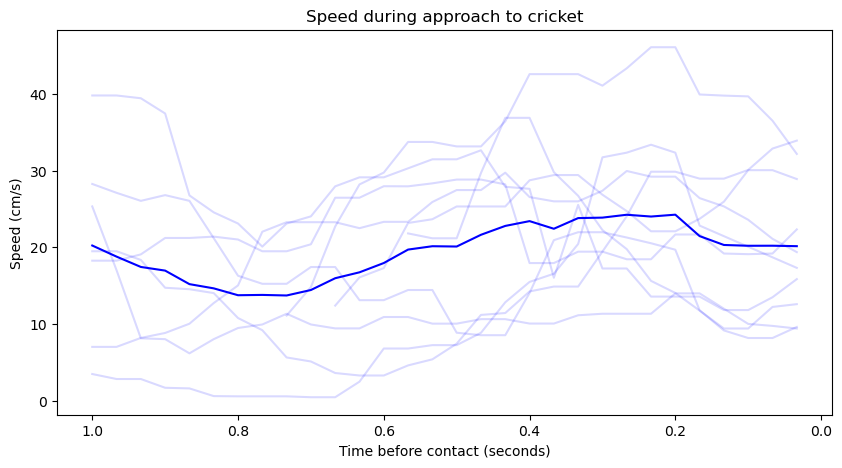

In [20]:
#plot the speed and azimuth
plt.figure(figsize=(10, 5))
# plt.plot(padded_speed_trial.T)
plt.plot(np.arange(len(padded_speed_trial[0][-30:]))/30, np.abs(padded_speed_trial[:,-30:]).T, color='blue', alpha=0.15)
plt.plot(np.arange(len(padded_speed_trial[0][-30:]))/30, np.nanmean(np.abs(padded_speed_trial[:,-30:]), axis=0), color='blue')
plt.ylabel('Speed (cm/s)')
plt.xlabel('Time before contact (seconds)')
plt.title('Speed during approach to cricket')
current_ticks = plt.gca().get_xticks()
_ = plt.gca().set_xticklabels([f'{tick:.1f}' for tick in np.flip(current_ticks)])
# plt.show()

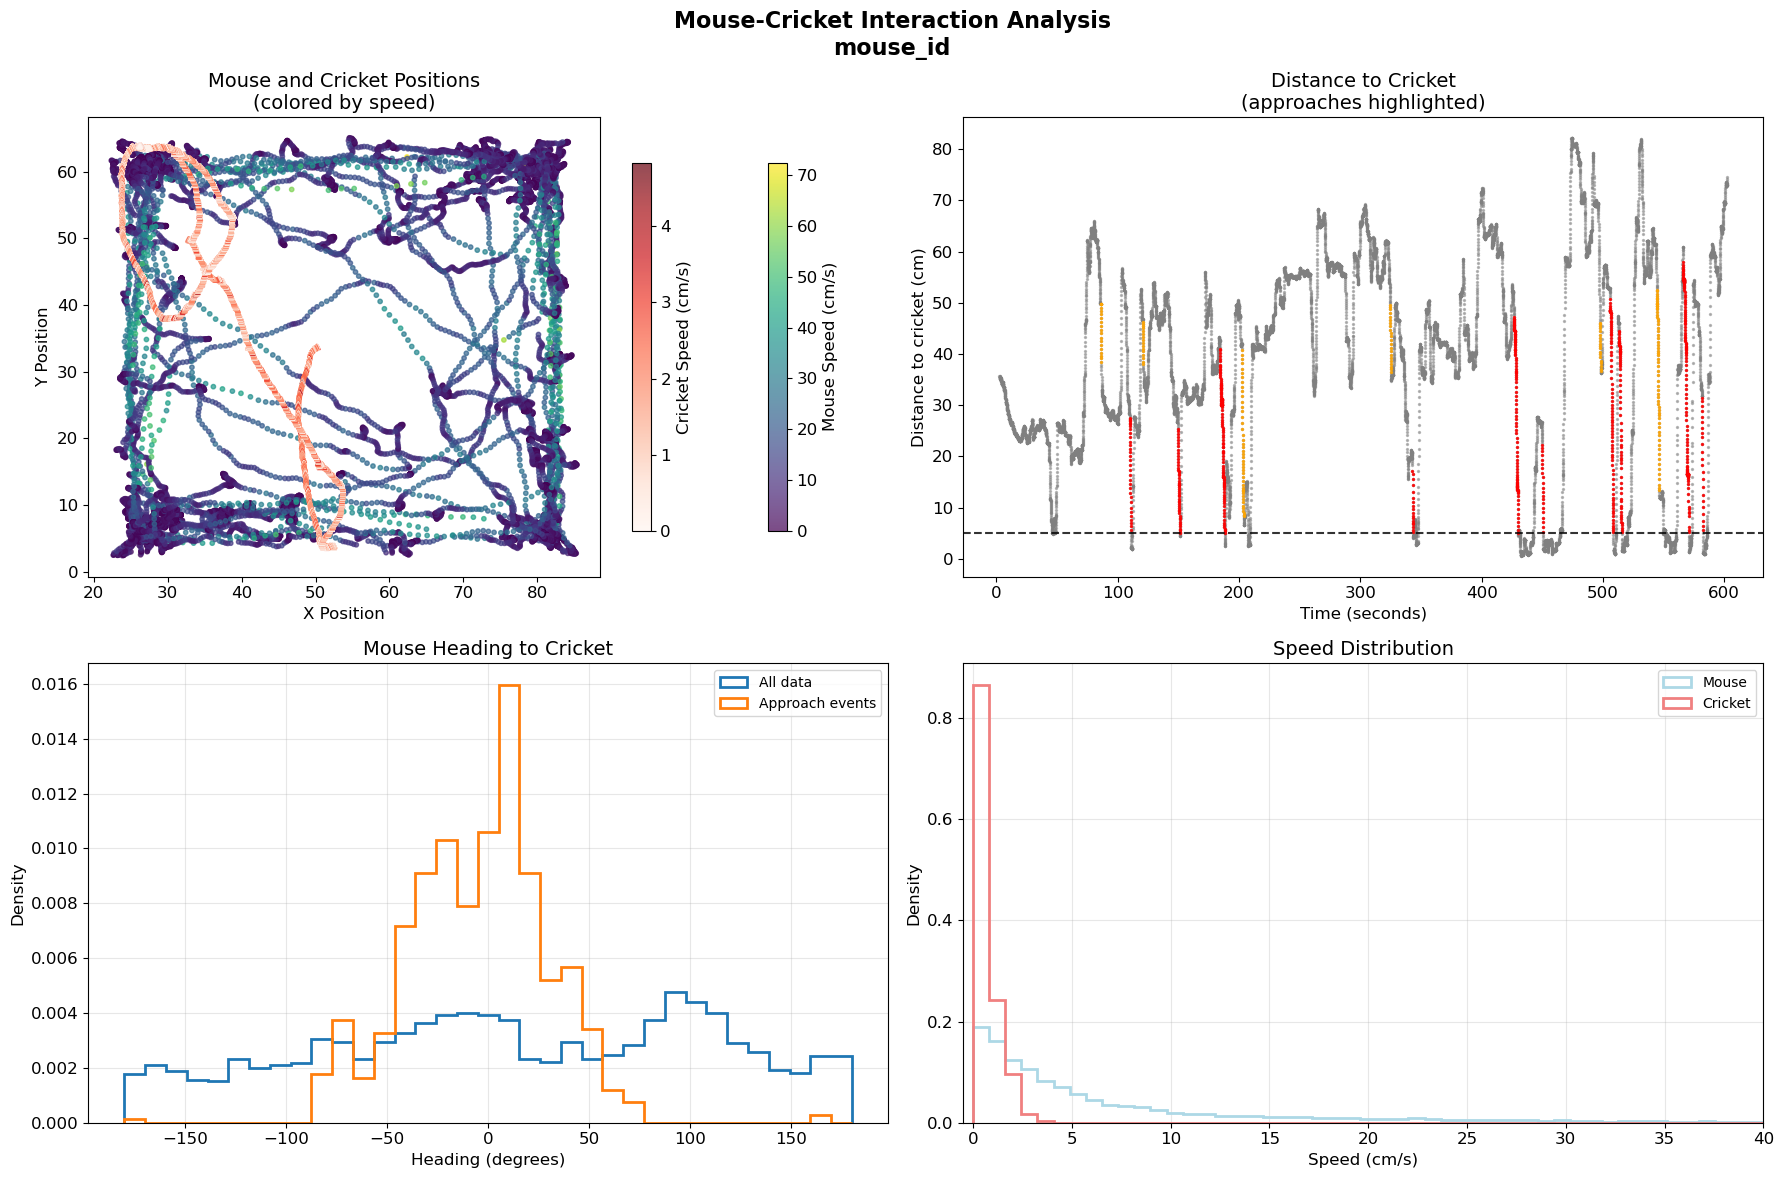

In [21]:
# Example usage:
fig = create_combined_analysis_plot(processed_file, mouse_x, mouse_y, mouse_speed, 
                                   cricket_speed, heading_cricket_mouse, distance_to_cricket, file_key = 'mouse_id')
plt.show()

In [82]:
GF_files = glob.glob('/home/arnabb/Code/live_cricket_analysis/suquoia_data/GermFree(GF)GroupA/*.xlsx')
CV_files = glob.glob('/home/arnabb/Code/live_cricket_analysis/suquoia_data/Control(CV)GroupC/*.xlsx')

In [23]:
def parse_filename(filename):
    """Parse filename to extract day, mouse_id, sex, trial"""
    basename = filename.split('/')[-1]
    group = basename.split('-')[1][0]
    day = basename.split('-')[0][1]
    mouse_id = basename.split('_')[1]
    sex = basename.split('_')[2][0]
    trial = basename.split('-')[2][0]
    return group, day, mouse_id, sex, trial

for file in GF_files:
    group, day, mouse_id, sex, trial = parse_filename(file)
    if sex == 'M' and mouse_id == '1' and day == '1':
        print(f'group: {group}, day: {day}, mouse_id: {mouse_id}, sex: {sex}, trial: {trial}')
        print(file)
        print('--------------------------------')

group: A, day: 1, mouse_id: 1, sex: M, trial: 2
/home/arnabb/Code/live_cricket_analysis/suquoia_data/GermFree(GF)GroupA/D1-A_1_M-2DeepCut_resnet50_CVvsGFprojectJul16shuffle1_1030000-processed.xlsx
--------------------------------
group: A, day: 1, mouse_id: 1, sex: M, trial: 3
/home/arnabb/Code/live_cricket_analysis/suquoia_data/GermFree(GF)GroupA/D1-A_1_M-3DeepCut_resnet50_CVvsGFprojectJul16shuffle1_1030000-processed.xlsx
--------------------------------
group: A, day: 1, mouse_id: 1, sex: M, trial: 1
/home/arnabb/Code/live_cricket_analysis/suquoia_data/GermFree(GF)GroupA/D1-A_1_M-1DeepCut_resnet50_CVvsGFprojectJul16shuffle1_1030000-processed.xlsx
--------------------------------


In [24]:
    # fig = create_combined_analysis_plot(processed_file,
    #                                     mouse_x,
    #                                     mouse_y,
    #                                     mouse_speed,
    #                                     cricket_speed,
    #                                     heading_cricket_mouse,
    #                                     distance_to_cricket,
    #                                     approach_events,
    #                                     file_key)

    # output_dir = '/home/arnab/Code/live_cricket_analysis/outputs'
    # os.makedirs(output_dir, exist_ok=True)
    # save_path = f'{output_dir}/{file_key}_combined_analysis.png'
    # plt.savefig(save_path)

    # plt.show()

In [83]:
def process_mouse_data(files):
    """
    Process mouse behavioral data from a list of files and organize into a dictionary.
    
    Args:
        files (list): List of file paths to process
        
    Returns:
        dict: Dictionary containing processed mouse data organized by mouse ID
    """
    mouse_data = {}

    for file in files:
        processed_file = pd.read_excel(file)
        mouse_speed = get_mouse_speed(processed_file)
        heading_cricket_mouse = get_mouse_heading_to_cricket(processed_file)
        distance_to_cricket = get_distance_to_cricket(processed_file)
        approach_events, incomplete_approach_events = get_approach_events(distance_to_cricket, mouse_speed, heading_cricket_mouse, processed_file)
        group, day, mouse_id, sex, trial = parse_filename(file)

        # Create a unique key based on group and mouse_id
        mouse_key = f"{group}-{mouse_id}-{sex}-{day}"
        
        # Initialize the mouse entry if it doesn't exist
        if mouse_key not in mouse_data:
            mouse_data[mouse_key] = {
                'mouse_speed': [],
                'heading_cricket_mouse': [],
                'distance_to_cricket': [],
                'approach_events': [],
                'incomplete_approach_events': [],
                'sex': sex,
                'mouse_id': mouse_id, 
                'group': group,
                'trials': [],
                'train_days': []
            }
        
        # Append trial data to the existing mouse entry
        mouse_data[mouse_key]['mouse_speed'].append(mouse_speed)
        mouse_data[mouse_key]['heading_cricket_mouse'].append(heading_cricket_mouse)
        mouse_data[mouse_key]['distance_to_cricket'].append(distance_to_cricket)
        mouse_data[mouse_key]['approach_events'].append(approach_events)
        mouse_data[mouse_key]['incomplete_approach_events'].append(incomplete_approach_events)
        mouse_data[mouse_key]['trials'].append(trial)
        mouse_data[mouse_key]['train_days'].append(day)
        
    return mouse_data

GF_data = process_mouse_data(GF_files)


In [84]:
CV_data = process_mouse_data(CV_files)

In [28]:
#Plots I need to make
#- [ ] Get approach start and end times
    #loop over all trials for a given day and for all days
    #- [ ] Cumulative speed 5 walking back from approach end + hist
    #- [ ] Same as above for approach start
    #- [ ] Average speed -1 to +1 from approach end
    #- [ ] Average heading -5 to +5 from approach end
    #- [ ] Average and max speed during approach across days
    #- [ ] Time to capture across days
    #- [ ] Distance travelled to capture and not capture across days
    #- [ ] Number of approach events across days
    #- [ ] Number of incomplete approches

# Function will either verage data by day, all days or by mouse

In [30]:
GF_data.keys()

dict_keys(['A-2-F-2', 'A-1-F-2', 'A-2-M-7', 'A-2-F-3', 'A-2-M-5', 'A-1-M-5', 'A-1-M-6', 'A-1-F-7', 'A-1-M-1', 'A-2-F-1', 'A-2-M-1', 'A-2-M-3', 'A-2-F-4', 'A-2-M-4', 'A-1-F-4', 'A-2-M-6', 'A-1-M-2', 'A-1-M-4', 'A-1-F-3', 'A-1-F-5', 'A-2-F-5', 'A-1-F-1', 'A-1-M-3', 'A-2-M-2'])

In [85]:
#Another dictonary for average data
def process_average_data(data):
    average_data = {}

    for key in data.keys():
        new_key = key[:-2]
        day = key[-1:]
        
        if new_key not in average_data:
            average_data[new_key] = {
                'all': {
                    'heading_cricket_mouse': [],
                    'mouse_speed': [],
                    'distance_to_cricket': [], 
                    'num_approach_events': 0,
                    'num_incomplete_approach_events': 0,
                    'heading_cricket_mouse+-5': [],
                    'mouse_speed+-5': [],
                    'distance_to_cricket+-5': []
                }
            }

        for i, approach_events in enumerate(data[key]['approach_events']):
            if day not in average_data[new_key]:
                average_data[new_key][day] = {
                    'heading_cricket_mouse': [],
                    'mouse_speed': [],
                    'distance_to_cricket': [],
                    'num_approach_events': 0,
                    'num_incomplete_approach_events': 0,
                    'heading_cricket_mouse+-5': [],
                    'mouse_speed+-5': [],
                    'distance_to_cricket+-5': []
                }
            for start, end in approach_events:
                # Regular data during approach
                average_data[new_key][day]['heading_cricket_mouse'].append(data[key]['heading_cricket_mouse'][i][start:end])
                average_data[new_key][day]['mouse_speed'].append(data[key]['mouse_speed'][i][start:end])
                average_data[new_key][day]['distance_to_cricket'].append(data[key]['distance_to_cricket'][i][start:end])
                average_data[new_key][day]['num_approach_events'] = len(approach_events)
                average_data[new_key][day]['num_incomplete_approach_events'] = len(data[key]['incomplete_approach_events'])
                
                # Extended data ±150 indices around end
                extended_start = end - 150
                extended_end = end + 150
                
                # Create padded arrays filled with NaN
                heading_padded = np.full(300, np.nan)
                speed_padded = np.full(300, np.nan)
                distance_padded = np.full(300, np.nan)
                
                # Get actual data
                data_start = max(0, extended_start)
                data_end = min(len(data[key]['heading_cricket_mouse'][i]), extended_end)
                
                # Calculate where in padded array to put the actual data
                pad_start = max(0, 150 - end)  # If too close to start
                pad_end = min(300, 300 - (extended_end - data_end))  # If too close to end
                
                # Insert actual data into padded arrays
                heading_padded[pad_start:pad_end] = data[key]['heading_cricket_mouse'][i][data_start:data_end]
                speed_padded[pad_start:pad_end] = data[key]['mouse_speed'][i][data_start:data_end]
                distance_padded[pad_start:pad_end] = data[key]['distance_to_cricket'][i][data_start:data_end]
                
                # Store padded arrays
                average_data[new_key][day]['heading_cricket_mouse+-5'].append(heading_padded)
                average_data[new_key][day]['mouse_speed+-5'].append(speed_padded)
                average_data[new_key][day]['distance_to_cricket+-5'].append(distance_padded)
                
                # Also append to 'all' key
                average_data[new_key]['all']['heading_cricket_mouse'].append(data[key]['heading_cricket_mouse'][i][start:end])
                average_data[new_key]['all']['mouse_speed'].append(data[key]['mouse_speed'][i][start:end])
                average_data[new_key]['all']['distance_to_cricket'].append(data[key]['distance_to_cricket'][i][start:end])
                average_data[new_key]['all']['num_approach_events'] += len(approach_events)
                average_data[new_key]['all']['num_incomplete_approach_events'] += len(data[key]['incomplete_approach_events'])
                average_data[new_key]['all']['heading_cricket_mouse+-5'].append(heading_padded)
                average_data[new_key]['all']['mouse_speed+-5'].append(speed_padded)
                average_data[new_key]['all']['distance_to_cricket+-5'].append(distance_padded)
                
    return average_data

In [239]:
#Another dictonary for average data

for key in GF_data.keys():
    new_key = key[:-2]
    day = key[-1:]
    
    if new_key not in GF_average_data:
        GF_average_data[new_key] = {
            'all': {
                'heading_cricket_mouse': [],
                'mouse_speed': [],
                'distance_to_cricket': [],
                'num_approach_events': 0,
                'num_incomplete_approach_events': 0,
                'heading_cricket_mouse+-5': [],
                'mouse_speed+-5': [],
                'distance_to_cricket+-5': []
            }
        }

    for i, approach_events in enumerate(GF_data[key]['approach_events']):
        if day not in GF_average_data[new_key]:
            GF_average_data[new_key][day] = {
                # Regular data during approach
                'heading_cricket_mouse': [],
                'mouse_speed': [],
                'distance_to_cricket': [],
                'num_approach_events': 0,
                'num_incomplete_approach_events': 0,
                'heading_cricket_mouse+-5': [],
                'mouse_speed+-5': [],
                'distance_to_cricket+-5': []
            }
            
        # Set the event counts once per video, not per event
        GF_average_data[new_key][day]['num_approach_events'] = len(approach_events)
        GF_average_data[new_key][day]['num_incomplete_approach_events'] = len(GF_data[key]['incomplete_approach_events'])
            
        for start, end in approach_events:
            # Regular data during approach
            GF_average_data[new_key][day]['heading_cricket_mouse'].append(GF_data[key]['heading_cricket_mouse'][i][start:end])
            GF_average_data[new_key][day]['mouse_speed'].append(GF_data[key]['mouse_speed'][i][start:end])
            GF_average_data[new_key][day]['distance_to_cricket'].append(GF_data[key]['distance_to_cricket'][i][start:end])
            
            # Extended data ±150 indices around end
            extended_start = end - 150
            extended_end = end + 150
            
            # Create padded arrays filled with NaN
            heading_padded = np.full(300, np.nan)
            speed_padded = np.full(300, np.nan)
            distance_padded = np.full(300, np.nan)
            
            # Get actual data
            data_start = max(0, extended_start)
            data_end = min(len(GF_data[key]['heading_cricket_mouse'][i]), extended_end)
            
            # Calculate where in padded array to put the actual data
            pad_start = max(0, 150 - end)  # If too close to start
            pad_end = min(300, 300 - (extended_end - data_end))  # If too close to end
            
            # Insert actual data into padded arrays
            heading_padded[pad_start:pad_end] = GF_data[key]['heading_cricket_mouse'][i][data_start:data_end]
            speed_padded[pad_start:pad_end] = GF_data[key]['mouse_speed'][i][data_start:data_end]
            distance_padded[pad_start:pad_end] = GF_data[key]['distance_to_cricket'][i][data_start:data_end]
            
            # Store padded arrays
            GF_average_data[new_key][day]['heading_cricket_mouse+-5'].append(heading_padded)
            GF_average_data[new_key][day]['mouse_speed+-5'].append(speed_padded)
            GF_average_data[new_key][day]['distance_to_cricket+-5'].append(distance_padded)
            
            # Also append to 'all' key
            GF_average_data[new_key]['all']['heading_cricket_mouse'].append(GF_data[key]['heading_cricket_mouse'][i][start:end])
            GF_average_data[new_key]['all']['mouse_speed'].append(GF_data[key]['mouse_speed'][i][start:end])
            GF_average_data[new_key]['all']['distance_to_cricket'].append(GF_data[key]['distance_to_cricket'][i][start:end])
            GF_average_data[new_key]['all']['heading_cricket_mouse+-5'].append(heading_padded)
            GF_average_data[new_key]['all']['mouse_speed+-5'].append(speed_padded)
            GF_average_data[new_key]['all']['distance_to_cricket+-5'].append(distance_padded)

        # Add counts to 'all' once per video, not per event
        GF_average_data[new_key]['all']['num_approach_events'] += len(approach_events)
        GF_average_data[new_key]['all']['num_incomplete_approach_events'] += len(GF_data[key]['incomplete_approach_events'])

In [257]:
CV_average_data['C-1-F']['4']['num_approach_events']

7

In [251]:
GF_average_data['A-1-F']['1']['distance_to_cricket+-5']
# GF_average_data['A-2-F']['all']['num_incomplete_approach_events']

[array([17.11973697, 17.14982932, 17.04403571, 16.99208   , 16.92699228,
        16.84846366, 16.75731668, 16.7089524 , 16.57074263, 16.50662155,
        16.44990452, 16.39163788, 16.29651636, 16.30955845, 16.52096172,
        16.5641593 , 16.6195018 , 16.60789887, 16.65264676, 16.6499257 ,
        16.68524437, 16.67437884, 16.67676521, 16.63807935, 16.65050039,
        16.65188291, 16.66682004, 16.71715101, 16.63399709, 16.57764426,
        16.56305404, 16.48416457, 16.47146321, 16.41911175, 16.36633221,
        16.31745207, 16.33651676, 16.31108583, 16.2207603 , 16.23081604,
        16.31747284, 16.34172293, 16.31270172, 16.31604411, 16.27713722,
        16.2351009 , 16.0847603 , 15.94531979, 15.84911356, 15.73794603,
        15.57729983, 15.48256189, 15.15117542, 15.14970861, 15.02320085,
        14.9682586 , 14.94118574, 14.8546778 , 14.85068117, 14.84582432,
        14.83189048, 14.84788561, 14.81596773, 14.85354201, 15.13038051,
        15.01918098, 15.30497577, 15.37341179, 15.5

In [87]:
GF_average_data = process_average_data(GF_data)
CV_average_data = process_average_data(CV_data)

/tmp/ipykernel_5550/3137551016.py:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ = plt.gca().set_xticklabels([f'{tick:.1f}' for tick in current_ticks])


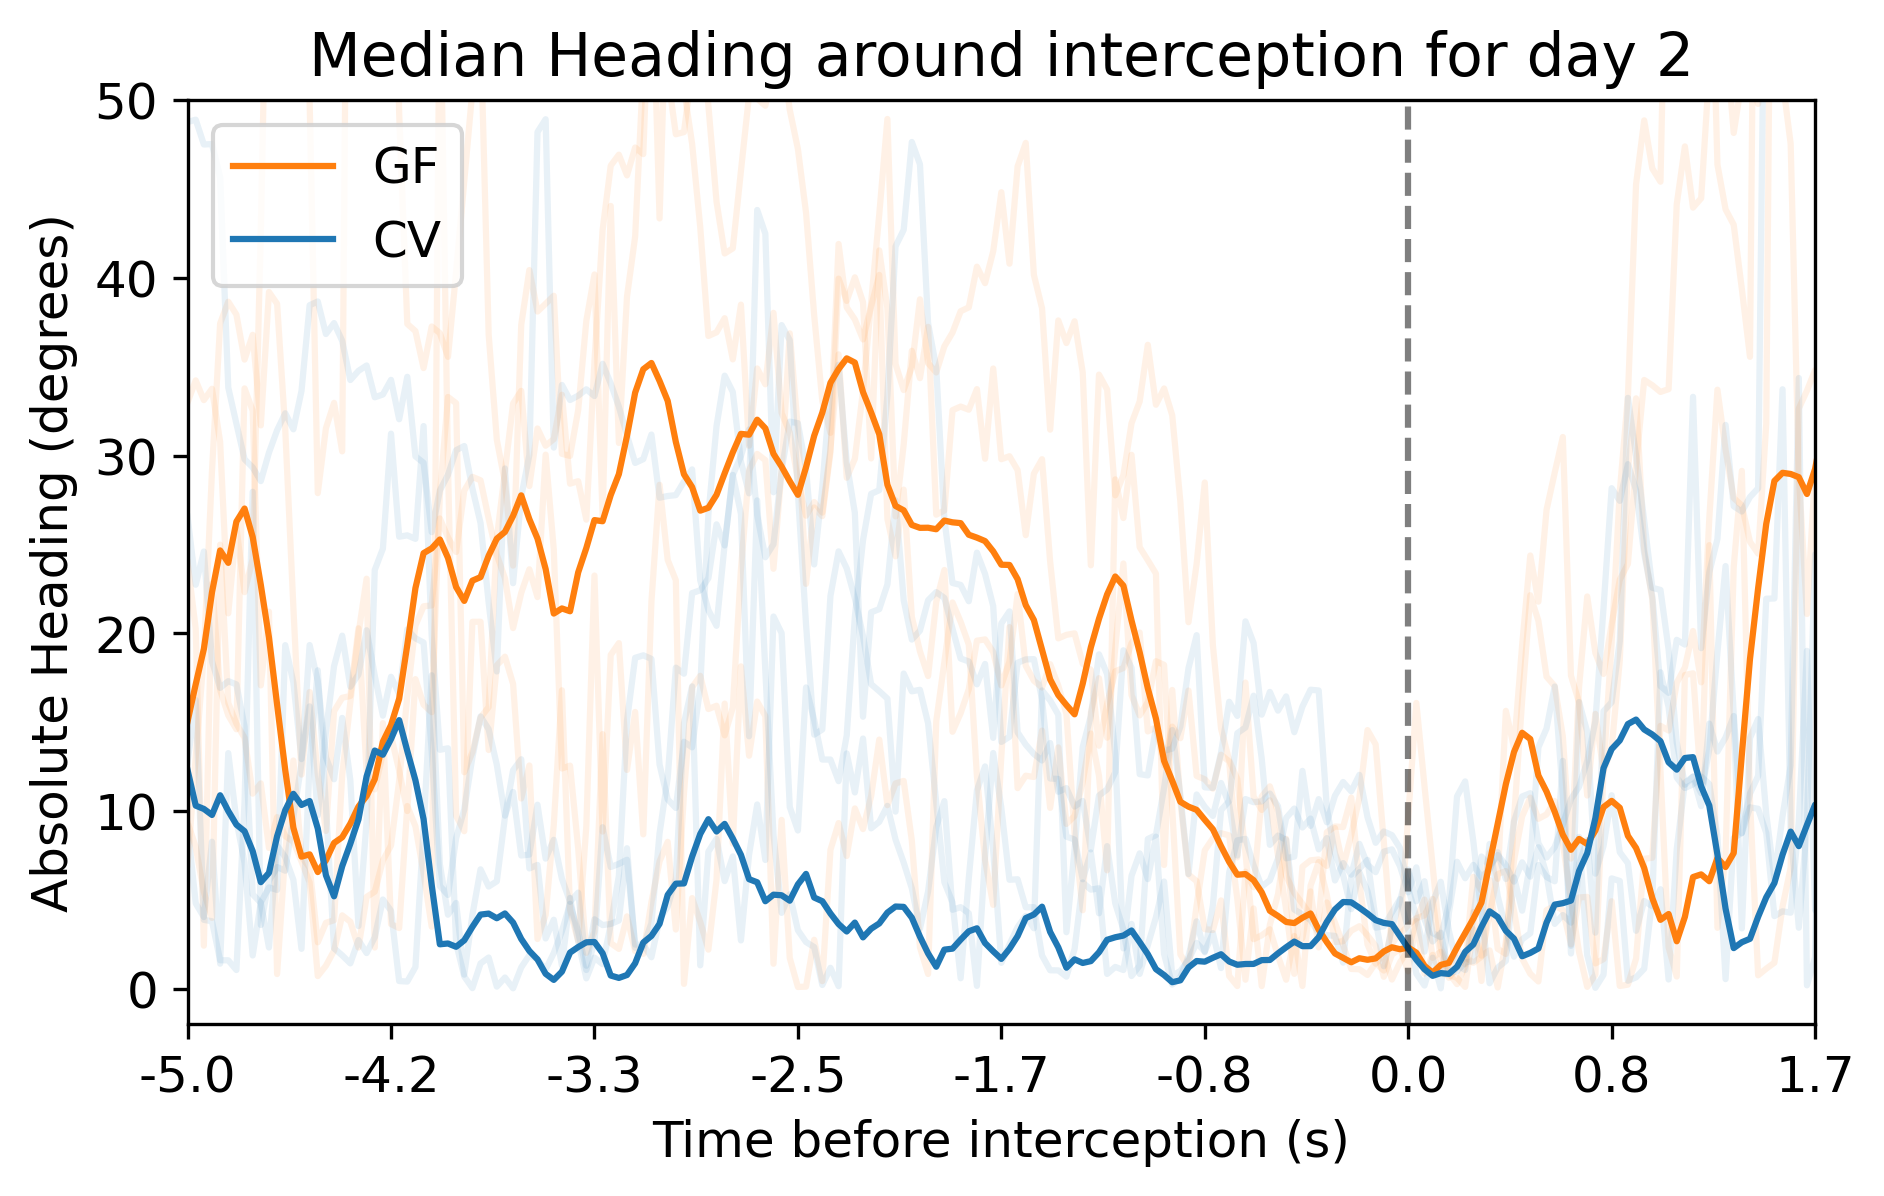

In [198]:
# Stack and average the heading data across all keys
GF_all_headings = []
CV_all_headings = []
day = '2'
plt.figure(figsize=(7, 4), dpi=300)
for key in GF_average_data.keys():
    headings = np.stack(GF_average_data[key][day]['heading_cricket_mouse+-5'])
    avg_heading = np.nanmedian(headings, axis=0)
    plt.plot(np.abs(avg_heading), color = '#ff7f0e', alpha = 0.1)
    GF_all_headings.append(avg_heading)

for key in CV_average_data.keys():
    headings = np.stack(CV_average_data[key][day]['heading_cricket_mouse+-5'])
    avg_heading = np.nanmedian(headings, axis=0)
    plt.plot(np.abs(avg_heading), color = '#1f77b4', alpha = 0.1)
    CV_all_headings.append(avg_heading)

# Average across all keys
# Apply a smoothing filter to the averaged data
window_size = 5
GF_overall_avg_heading = np.abs(np.nanmedian(np.stack(GF_all_headings), axis=0))
CV_overall_avg_heading = np.abs(np.nanmedian(np.stack(CV_all_headings), axis=0))
GF_filtered = np.convolve(GF_overall_avg_heading, np.ones(window_size)/window_size, mode='valid')
CV_filtered = np.convolve(CV_overall_avg_heading, np.ones(window_size)/window_size, mode='valid')
plt.plot(GF_filtered, color = '#ff7f0e', label = 'GF')
plt.plot(CV_filtered, color = '#1f77b4', label = 'CV')
plt.axvline(150, color = 'black', linestyle = '--', alpha = 0.5)
plt.ylim(-2, 50)
plt.xlim(0, 200)
plt.title(f'Median Heading around interception for day {day}')
plt.xlabel('Time before interception (s)')
plt.ylabel('Absolute Heading (degrees)')
current_ticks = plt.gca().get_xticks()
current_ticks = (current_ticks-150)/30
_ = plt.gca().set_xticklabels([f'{tick:.1f}' for tick in current_ticks])

plt.legend()
plt.show()


In [174]:
current_ticks/30

array([0.        , 0.83333333, 1.66666667, 2.5       , 3.33333333,
       4.16666667, 5.        , 5.83333333, 6.66666667])

/tmp/ipykernel_5550/2436123035.py:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ = plt.gca().set_xticklabels([f'{tick:.1f}' for tick in current_ticks])


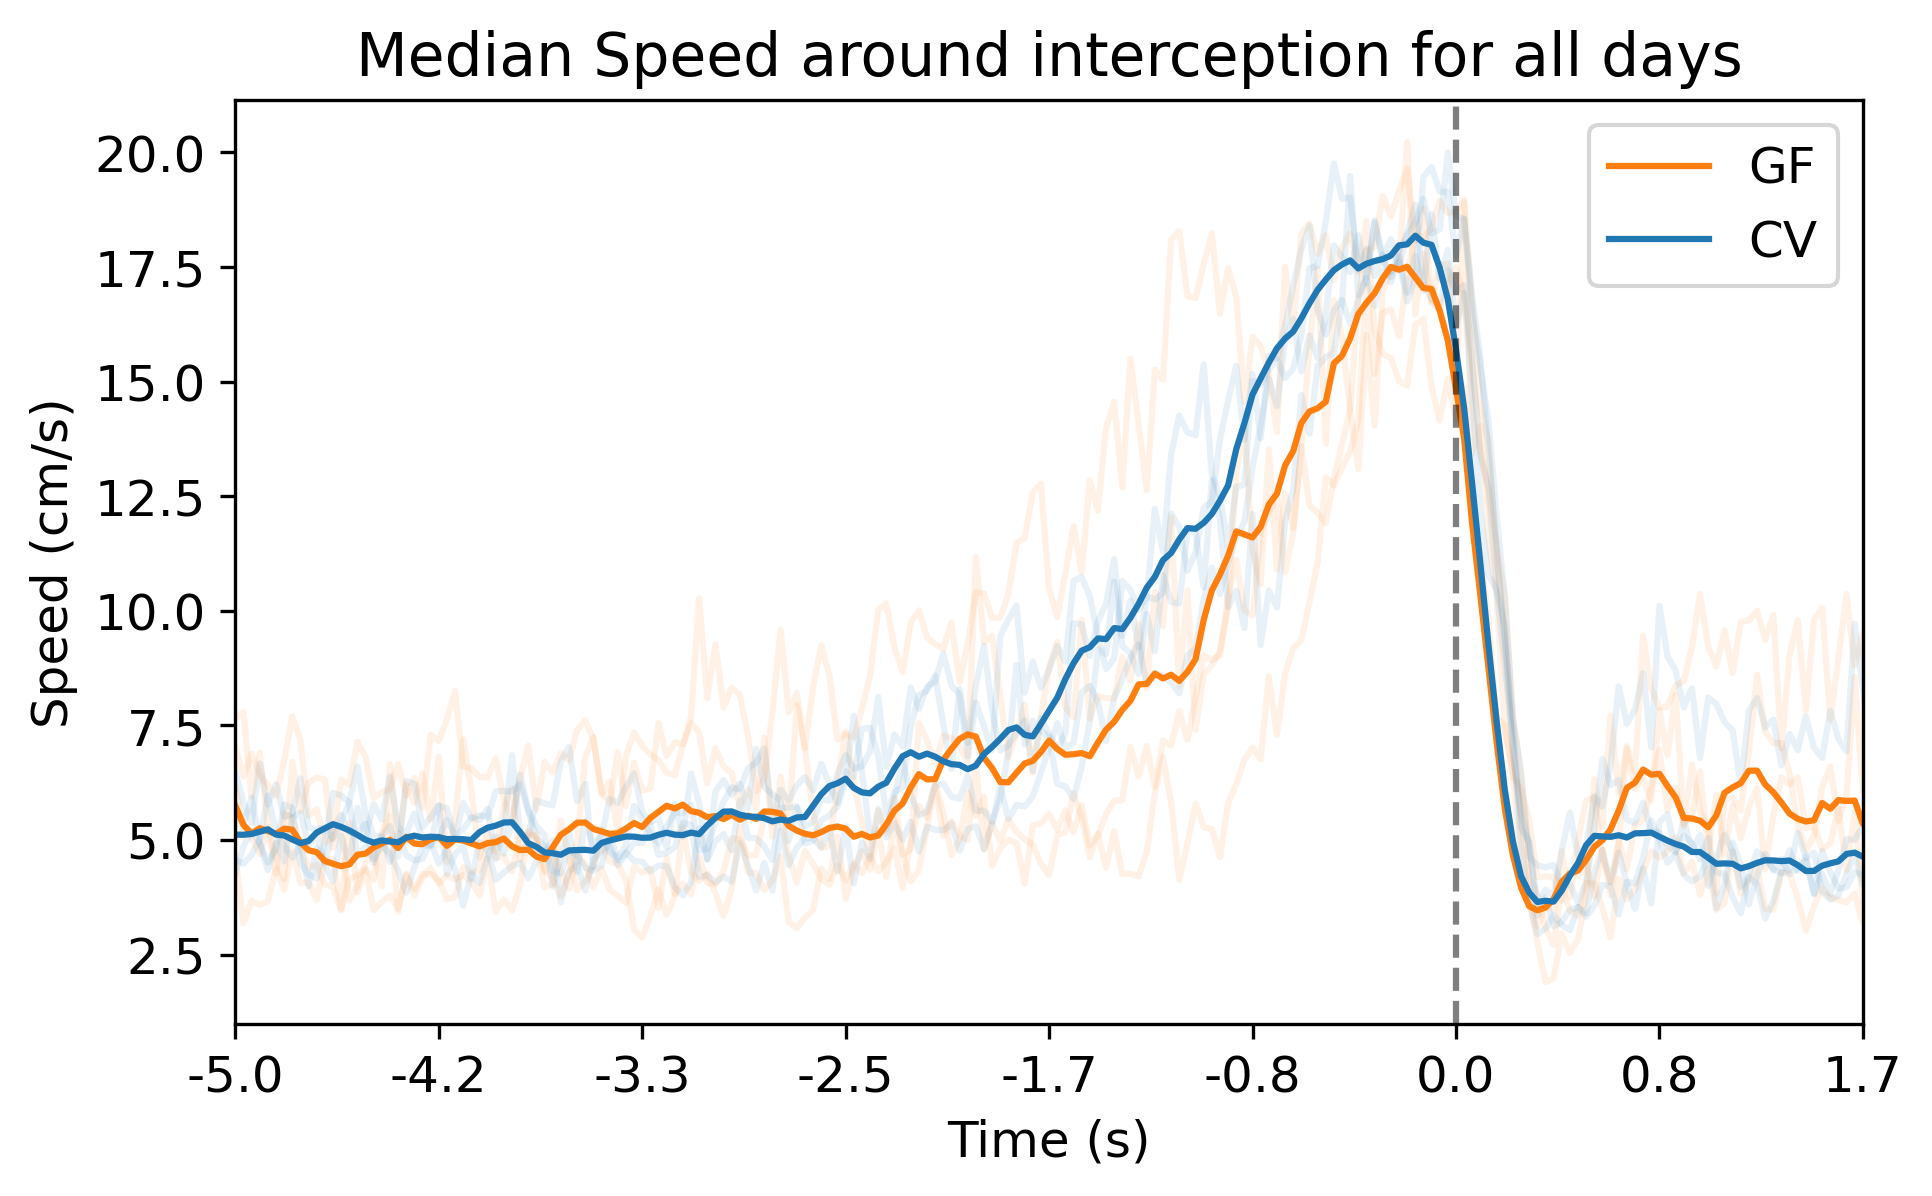

In [205]:
# Stack and average the heading data across all keys
GF_all_speeds = []
CV_all_speeds = []
day = 'all'
plt.figure(figsize=(7, 4), dpi=300)
for key in GF_average_data.keys():
    speeds = np.stack(GF_average_data[key][day]['mouse_speed+-5'])
    avg_speed = np.nanmedian(speeds, axis=0)
    plt.plot(avg_speed, color = '#ff7f0e', alpha = 0.1)
    GF_all_speeds.append(avg_speed)

for key in CV_average_data.keys():
    speeds = np.stack(CV_average_data[key][day]['mouse_speed+-5'])
    avg_speed = np.nanmedian(speeds, axis=0)
    plt.plot(avg_speed, color = '#1f77b4', alpha = 0.1)
    CV_all_speeds.append(avg_speed)

# Average across all keys
GF_overall_avg_speed = np.nanmedian(np.stack(GF_all_speeds), axis=0)
CV_overall_avg_speed = np.nanmedian(np.stack(CV_all_speeds), axis=0)
# plt.plot(GF_overall_avg_speed, color = '#ff7f0e', label = 'GF')
# plt.plot(CV_overall_avg_speed, color = '#1f77b4', label = 'CV')
GF_filtered = np.convolve(GF_overall_avg_speed, np.ones(window_size)/window_size, mode='valid')
CV_filtered = np.convolve(CV_overall_avg_speed, np.ones(window_size)/window_size, mode='valid')
plt.plot(GF_filtered, color = '#ff7f0e', label = 'GF')
plt.plot(CV_filtered, color = '#1f77b4', label = 'CV')
plt.axvline(150, color = 'black', linestyle = '--', alpha = 0.5)
plt.xlim(0, 200)
plt.title(f'Median Speed around interception for all days')
plt.xlabel('Time (s)')
plt.ylabel('Speed (cm/s)')
plt.legend()
current_ticks = plt.gca().get_xticks()
current_ticks = (current_ticks-150)/30
_ = plt.gca().set_xticklabels([f'{tick:.1f}' for tick in current_ticks])

plt.show()

In [219]:
GF_average_data['A-2-F']['']['num_approach_events']

KeyError: '6'

In [ ]:
# Stack and average the heading data across all keys
GF_all_speeds = []
CV_all_speeds = []
day = 'all'
plt.figure(figsize=(7, 4), dpi=300)
for key in GF_average_data.keys():
    speeds = np.stack(GF_average_data[key][day]['mouse_speed+-5'])
    avg_speed = np.nanmedian(speeds, axis=0)
    plt.plot(avg_speed, color = '#ff7f0e', alpha = 0.1)
    GF_all_speeds.append(avg_speed)

for key in CV_average_data.keys():
    speeds = np.stack(CV_average_data[key][day]['mouse_speed+-5'])
    avg_speed = np.nanmedian(speeds, axis=0)
    plt.plot(avg_speed, color = '#1f77b4', alpha = 0.1)
    CV_all_speeds.append(avg_speed)

# Average across all keys
GF_overall_avg_speed = np.nanmedian(np.stack(GF_all_speeds), axis=0)
CV_overall_avg_speed = np.nanmedian(np.stack(CV_all_speeds), axis=0)
# plt.plot(GF_overall_avg_speed, color = '#ff7f0e', label = 'GF')
# plt.plot(CV_overall_avg_speed, color = '#1f77b4', label = 'CV')
GF_filtered = np.convolve(GF_overall_avg_speed, np.ones(window_size)/window_size, mode='valid')
CV_filtered = np.convolve(CV_overall_avg_speed, np.ones(window_size)/window_size, mode='valid')
plt.plot(GF_filtered, color = '#ff7f0e', label = 'GF')
plt.plot(CV_filtered, color = '#1f77b4', label = 'CV')
plt.axvline(150, color = 'black', linestyle = '--', alpha = 0.5)
plt.xlim(0, 200)
plt.title(f'Median Speed around interception for all days')
plt.xlabel('Time (s)')
plt.ylabel('Speed (cm/s)')
plt.legend()
current_ticks = plt.gca().get_xticks()
current_ticks = (current_ticks-150)/30
_ = plt.gca().set_xticklabels([f'{tick:.1f}' for tick in current_ticks])

plt.show()

In [206]:
1/np.nanstd(GF_all_speeds), np.nanmean(GF_all_speeds)

(np.float64(0.27485032944023685), np.float64(6.860391375278344))

In [72]:
for key in GF_data.keys():
    if GF_data[key]['sex'] == 'M':
        print(key)

dict_keys(['D1-A_1_M-3', 'D1-A_2_M-1', 'D1-A_1_F-3', 'D5-A_2_F-3', 'D2-A_2_M-1', 'D3-A_1_M-3', 'D6-A_1_M-2', 'D2-A_2_F-2', 'D4-A_1_F-2', 'D2-A_1_F-2', 'D3-A_2_M-1', 'D4-A_2_M-2', 'D3-A_2_F-3', 'D2-A_1_M-2', 'D7-A_2_M-1', 'D4-A_1_F-3', 'D1-A_1_M-1', 'D5-A_2_M-2', 'D2-A_1_F-3', 'D3-A_1_F-1', 'D4-A_2_F-3', 'D3-A_2_M-2', 'D3-A_2_F-2', 'D3-A_2_F-1', 'D1-A_1_F-2', 'D4-A_2_M-3', 'D1-A_2_M-3', 'D2-A_2_M-3', 'D5-A_1_M-1', 'D2-A_2_M-2', 'D1-A_2_F-1', 'D4-A_2_M-1', 'D7-A_1_F-1', 'D6-A_1_M-3', 'D4-A_2_F-1', 'D1-A_1_M-2', 'D5-A_1_F-2', 'D2-A_2_F-1', 'D6-A_2_M-1', 'D3-A_2_M-3', 'D5-A_1_F-1', 'D3-A_1_F-2', 'D7-A_1_F-2', 'D1-A_2_F-3', 'D1-A_2_F-2', 'D5-A_2_M-3', 'D7-A_2_M-2', 'D4-A_2_F-2', 'D4-A_1_M-2', 'D1-A_1_F-1', 'D1-A_2_M-2', 'D5-A_1_F-3', 'D6-A_2_M-2', 'D5-A_2_M-1', 'D3-A_1_M-1', 'D4-A_1_F-1', 'D2-A_2_F-3', 'D2-A_1_F-1', 'D4-A_1_M-3', 'D6-A_2_M-3', 'D7-A_1_F-3', 'D5-A_1_M-2', 'D3-A_1_F-3', 'D3-A_1_M-2', 'D5-A_2_F-2', 'D2-A_1_M-1', 'D2-A_1_M-3', 'D5-A_1_M-3', 'D5-A_2_F-1', 'D7-A_2_M-3', 'D4-A_1_M

In [33]:
group_1_data.keys()

dict_keys(['D7-A_1_F-3', 'D4-A_2_F-2', 'D4-A_2_M-1', 'D2-A_2_M-1'])

In [34]:
group_1_data['D7-A_1_F-3'].keys()

dict_keys(['processed_file', 'mouse_x', 'mouse_y', 'mouse_speed', 'cricket_speed', 'heading_cricket_mouse', 'distance_to_cricket', 'approach_events', 'incomplete_approach_events'])

In [35]:
for key in group_1_data.keys():
    print(key)
    print(group_1_data[key]['approach_events'])
    print('--------------------------------')

D7-A_1_F-3
[(553, 638), (803, 912), (2055, 2083), (2293, 2308), (2612, 2622)]
--------------------------------
D4-A_2_F-2
[(21, 217), (1300, 1351), (1762, 1772), (2122, 2145), (3595, 3675), (3815, 3896), (4065, 4078), (4973, 5102), (5362, 5399), (6254, 6299)]
--------------------------------
D4-A_2_M-1
[(571, 644), (699, 709), (857, 1029), (1988, 2077), (2189, 2209), (2339, 2367), (2742, 2804), (3026, 3091), (3462, 3535)]
--------------------------------
D2-A_2_M-1
[(1052, 1089), (3096, 3111), (4864, 4917), (5551, 5632), (10024, 10098), (15544, 15588), (16441, 16485)]
--------------------------------


In [17]:
# Find indices where full body freeze transitions from 1 to 0
transition_indices = np.where(np.diff(np.array(dataframe.FullBodyFreeze)) == -1)[0] + 1

array([  548,  3067,  3270,  3294,  4576,  4700,  4929,  5894,  7486,
        7518,  8106,  8483,  8522,  9389,  9493, 10059, 10086, 10289,
       10526, 10624, 10695, 12035, 12396, 12683, 12715, 12878, 12928,
       13222, 13404, 13669, 13833, 14402, 14623, 15364, 15914, 16692,
       16729, 17048, 17524, 17554])

In [18]:
fps = 30
n_post_freeze_seconds = 5
n_post_freeze_frames = n_post_freeze_seconds * fps

def compute_post_freeze_speeds(dataframe,
                            transition_indices,
                            fps=30,
                            n_post_freeze_seconds=5,
                            return_end_idx = False):
    #check heading
    n_post_freeze_frames = n_post_freeze_seconds * fps
    epoch_speeds = []
    if return_end_idx:
        end_idxs = []
    for i, transition_index in enumerate(transition_indices):

        end_index = min(transition_index + n_post_freeze_frames, len(dataframe))
        
        # Check for freeze periods
        freeze_indices = np.where(dataframe.FullBodyFreeze.iloc[transition_index:end_index] == 1)[0]
        if freeze_indices.size > 0:
            end_index = transition_index + freeze_indices[0]
        
        # Check if next transition is too close
        if i < len(transition_indices) - 1:
            next_transition_index = transition_indices[i + 1]
            if next_transition_index - end_index < n_post_freeze_frames:
                end_index = next_transition_index
        
        epoch_speeds.append(get_speed(dataframe, transition_index, end_index))
        if return_end_idx:
            end_idxs.append(end_index)
    if return_end_idx:
        return epoch_speeds, end_idxs
    else:
        return epoch_speeds


In [43]:
from glob import glob
group_1_files = glob('./Control(CV)/*.xlsx')
group_2_files = glob('./Germ-free(GF)/*.xlsx')

In [23]:
transition_indices = np.where(np.diff(dataframe.FullBodyFreeze) == -1)[0] + 1
speeds = compute_post_freeze_speeds(dataframe, transition_indices, fps=30, n_post_freeze_seconds=5)
    

In [24]:
len(group_1_files)

83

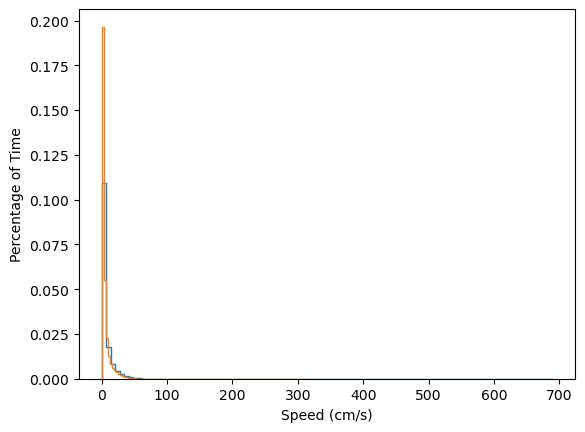

In [26]:
group_1_speeds = []
group_2_speeds = []
group_1_headings = []
group_1_cricket_azimuths = []
group_2_headings = []
group_2_cricket_azimuths = []
for file in group_1_files:
    dataframe = pd.read_excel(file)
    transition_indices = np.where(np.diff(dataframe.FullBodyFreeze) == -1)[0] + 1
    speeds = compute_post_freeze_speeds(dataframe, transition_indices, fps=30, n_post_freeze_seconds=5)
    group_1_speeds.extend(speeds)
    for i in range(len(transition_indices)):
        heading, cricket_azimuth = get_mouse_heading(dataframe, (transition_indices[i], return_cricket_azimuth=True)
        group_1_headings.append(heading)
        group_1_cricket_azimuths.append(cricket_azimuth)
for file in group_2_files:
    dataframe = pd.read_excel(file)
    transition_indices = np.where(np.diff(dataframe.FullBodyFreeze) == -1)[0] + 1
    speeds = compute_post_freeze_speeds(dataframe, transition_indices, fps=30, n_post_freeze_seconds=5)
    group_2_speeds.extend(speeds)

In [41]:
def pad_speed_sequences(speed_sequences):
    # Find max length of sequences
    max_len = max(len(seq) for seq in speed_sequences)

    # Create padded array with nans
    padded_speeds = np.array([np.pad(seq, (0, max_len - len(seq)),
                                    constant_values=np.nan)
                             for seq in speed_sequences])
    return padded_speeds

In [76]:
padded_speeds_1 = pad_speed_sequences(group_1_speeds)
padded_speeds_2 = pad_speed_sequences(group_2_speeds)
mean_1 = np.nanmean(padded_speeds_1, axis=0)
mean_2 = np.nanmean(padded_speeds_2, axis=0)

# confidence_level = 0.95  # 95% confidence interval
# n1 = np.sum(~np.isnan(padded_speeds_1), axis=0)  # number of non-nan values at each timepoint
# n2 = np.sum(~np.isnan(padded_speeds_2), axis=0)
# sem_1 = np.nanstd(padded_speeds_1, axis=0) / np.sqrt(n1)
# sem_2 = np.nanstd(padded_speeds_2, axis=0) / np.sqrt(n2)
# ci_1 = sem_1 * stats.t.ppf((1 + confidence_level) / 2, n1 - 1)
# ci_2 = sem_2 * stats.t.ppf((1 + confidence_level) / 2, n2 - 1)

plt.plot(mean_1)
# plt.fill_between(range(len(mean_1)), mean_1-ci_1, mean_1+ci_1, alpha=0.3)
plt.plot(mean_2)
# plt.fill_between(range(len(mean_2)), mean_2-ci_2, mean_2+ci_2, alpha=0.3)
# plt.legend()

NameError: name 'pad_speed_sequences' is not defined

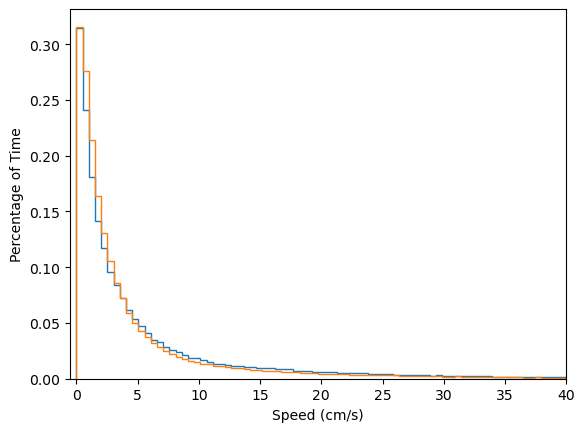

In [28]:
plt.hist(np.concatenate(group_1_speeds), bins=np.linspace(0, 40, 80), density=True, histtype='step')
plt.hist(np.concatenate(group_2_speeds), bins=np.linspace(0, 40, 80), density=True, histtype='step')
plt.xlim(-0.5, 40)
plt.ylabel('Percentage of Time')
plt.xlabel('Speed (cm/s)')
plt.show()

In [ ]:
#Video with labels in top right corner for approach, speed (changes color)
# heading and arrow
# Centroid with alpha dots history for 4 seconds
# Cricket trajectory - alpha dot